In [1]:
import yfinance as yf  
import matplotlib.pyplot as plt
import numpy as np
import urllib
import os
import sys
import seaborn as sns
import urllib.request
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [4]:
def get_etf_holdings(etf_name='QQQ'):
    req = urllib.request.Request(
        url=r"https://www.zacks.com/funds/etf/"+etf_name+"/holding",
        headers={'User-Agent':' Mozilla/5.0 (Windows NT 6.1; WOW64; rv:12.0) Gecko/20100101 Firefox/12.0'})
    handler = urllib.request.urlopen(req)
    fdata = handler.read().decode("utf-8")
    fdata = fdata.split('etf_holdings.formatted_data')[1].split('etf_holdings.table_header')[0].split('[')[2:]
    tickers = []
    for d in fdata:
        loc = d.find('rel')
        try:
            this_data = d[loc:].split('\\"')[1].split('\\"')[0]
            tickers.append(this_data)
        except:
            pass
    tickers.append(etf_name)
    return tickers

def get_plots(etf_name='QQQ', 
              start_date='2021-04-01',
              end_date='2021-12-30',
              selected_companies=['GOOG', 'GOOGL','TSLA','FB','AAPL','AMZN','NVDA','MSFT','QQQ','AMD','QCOM','AMAT'],
              plotx=True,
              fontsize=15,
              dpi=200):
    """
    Visualize growth rate of stocks within an ETF.
    Args:
        etf_name: the symbol of the ETF
        start_date: the start date
        end_date: the end date
        selected_companies: 
            select a bunch of interested companies so
            that you can color them with a different color
        plotx: choose whether to have a vertical barplot
        fontsize: fontsize of x,y axis ticks
        dpi: the resolution of the picture
    """
    values = []
    tickers_list = get_etf_holdings(etf_name)
    old_stdout = sys.stdout # backup current stdout
    sys.stdout = open(os.devnull, "w")
    holdings = []
    for s in tickers_list:
        data = yf.download(tickers=[s], start=start_date, end=end_date)
        try:
            this_value = data['Close'][len(data['Close'])-1]/data['Open'][0]
            if np.isnan(this_value):
                this_value = data['Close'][len(data['Close'])-2]/data['Open'][0]
            if np.isnan(this_value):
                this_value = data['Close'][len(data['Close'])-1]/data['Open'][1]
            if np.isnan(this_value):
                this_value = data['Close'][len(data['Close'])-2]/data['Open'][1]
            values.append(this_value)
            holdings.append(s)
        except:
            pass
    sys.stdout = old_stdout
    if plotx:
        index = np.argsort(values)[-1::-1].astype(int)
    else:
        index = np.argsort(values).astype(int)
    tickers = []
    ratio = []
    pos = 0
    best_pos = 0
    colors = []
    for i in index:
        tickers.append(holdings[i])
        ratio.append((values[i]-1 if values[i]>=1 else -(1-values[i]))*100)
        if holdings[i] == etf_name:
            best_pos = pos
        if holdings[i] not in selected_companies:
            colors.append('black')
        else:
            colors.append('red')
        pos += 1
    if plotx == False:
        fig,ax = plt.subplots(dpi=dpi,figsize=(4,26))
        ax.barh(np.arange(len(ratio)), ratio)
        ax.set_yticks(np.arange(len(ratio)))
        ax.set_yticklabels(tickers,rotation='0',fontsize=fontsize)
        for ytick, color in zip(ax.get_yticklabels(), colors):
            ytick.set_color(color)
        plt.hold = True
        ax.barh(best_pos,ratio[best_pos],color='orange')
        plt.ylim([-1,len(ratio)+2])
        ax.set_xlabel('ROI', fontsize=fontsize)
        ax.set_xlabel('ROI', fontsize=fontsize)
        plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    else:
        fig,ax = plt.subplots(dpi=dpi,figsize=(26,4))
        ax.bar(np.arange(len(ratio)), ratio)
        ax.set_xticks(np.arange(len(ratio)))
        ax.set_xticklabels(tickers,rotation='90',fontsize=fontsize)
        for xtick, color in zip(ax.get_xticklabels(), colors):
            xtick.set_color(color)
        plt.hold = True
        ax.bar(best_pos,ratio[best_pos],color='orange')
        plt.xlim([-1,len(ratio)+2])
        ax.set_ylabel('ROI', fontsize=fontsize)
        plt.setp(ax.get_yticklabels(), fontsize=fontsize)
    plt.title('Start Date='+str(start_date)+', End Date='+str(end_date),fontsize=fontsize)
    return

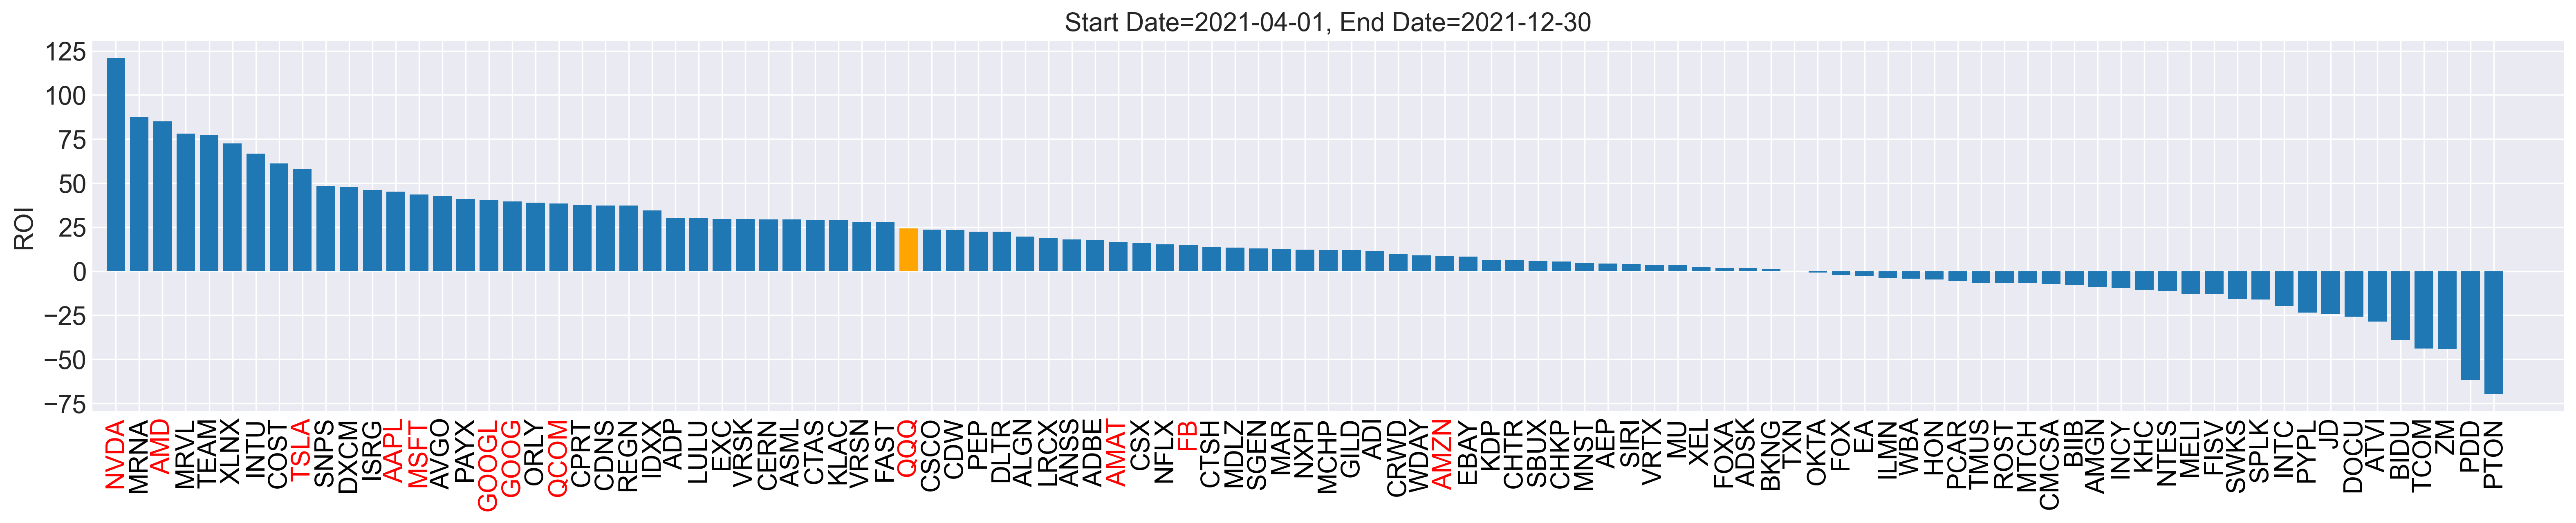

In [5]:
get_plots('QQQ', fontsize=15,dpi=300)